<a href="https://colab.research.google.com/github/EmilianoCastelan/MetodosNumericos/blob/main/Ejercicio_practico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio de aplicación:
2. Considere la Tabla 1, que muestra los datos de una epidemia de influenza en un colegio inglés.

In [3]:
t = [i for i in range(15)]
I = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
print("Tabla 1: Datos sobre la influenza en un colegio")
print("t\t", end = "")
for i in t: print(f"{str(i)}\t", end = "")
print("\nI(t)\t", end = "")
for i in I: print(f"{str(i)}\t", end = "")

Tabla 1: Datos sobre la influenza en un colegio
t	0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	
I(t)	1	3	6	25	73	222	294	258	237	191	125	69	27	11	4	

a) Trace la gráfica de estos datos.

**Sol:**

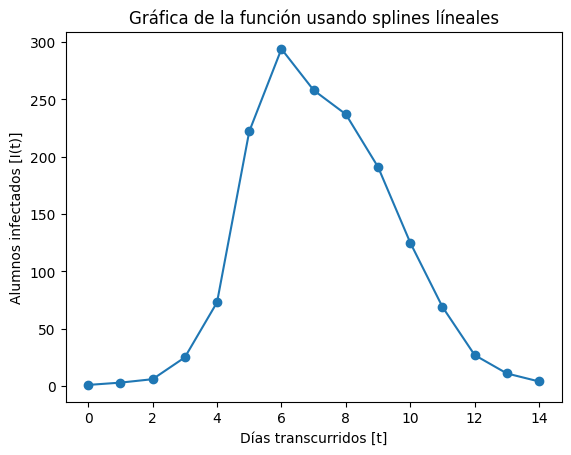

In [6]:
import matplotlib.pyplot as graf

graf.scatter(t, I)
graf.plot(t, I)
graf.ylabel("Alumnos infectados [I(t)]")
graf.xlabel("Días transcurridos [t]")
graf.title("Gráfica de la función usando splines líneales")
graf.show()

b) Use su splines cúbicos para trazar una curva suave sobre los mismos datos.

In [7]:
from math import *
import numpy as np
import matplotlib.pyplot as graf
x = np.array ([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y=np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])
ni=(x.size)
n=ni-1
A= np.zeros (ni)
a=np.zeros(n)
A[:]= y

h=np.zeros(n)
for i in range(0,n):
  h[i]=x[i+1]-x[i]
for j in range(0,n):
  a[j]=(3*(A[j+1]-A[j]))/h[j]-(3*(A[j]-A[j-1]))/h[j-1]
  l=np.zeros(n)
mu=np.zeros(n)
z=np.zeros(n)
l[0]=1
for k in range(1,n-1):
  l[k]=2*(x[k+1]-x[k-1])-h[k-1]*mu[k-1]
  mu[k]=h[k]/l[k]
  z[k]=(a[k]-h[k-1]*z[k-1])/l[k]
l[n-1]=1
c=np.zeros(ni)
b=np.zeros(n)
d=np.zeros(n)
c[1]=0.75685
c[2]=5.83007
for t in range(0,n):
  b[t]=(A[t+1]-A[t])/h[t]-(h[t]*(c[t+1]+2*c[t]))/3
  d[t]=(c[t+1]-c[t])/(3*h[t])

print("Sea el spline cubico natural descrito por tramos, S(x):")
for i in range(0,n):
  print(A[i],'+',b[i],'(x-',x[i],')+',c[i],'(x-',x[i],')^2+',d[i],'(x-',x[i],')^3, en ',x[i],'<= x <',x[i+1])


Sea el spline cubico natural descrito por tramos, S(x):
1.0 + 1.7477166666666666 (x- 0 )+ 0.0 (x- 0 )^2+ 0.25228333333333336 (x- 0 )^3, en  0 <= x < 1
3.0 + 0.5520766666666668 (x- 1 )+ 0.75685 (x- 1 )^2+ 1.6910733333333334 (x- 1 )^3, en  1 <= x < 2
6.0 + 15.113286666666667 (x- 2 )+ 5.83007 (x- 2 )^2+ -1.9433566666666666 (x- 2 )^3, en  2 <= x < 3
25.0 + 48.0 (x- 3 )+ 0.0 (x- 3 )^2+ 0.0 (x- 3 )^3, en  3 <= x < 4
73.0 + 149.0 (x- 4 )+ 0.0 (x- 4 )^2+ 0.0 (x- 4 )^3, en  4 <= x < 5
222.0 + 72.0 (x- 5 )+ 0.0 (x- 5 )^2+ 0.0 (x- 5 )^3, en  5 <= x < 6
294.0 + -36.0 (x- 6 )+ 0.0 (x- 6 )^2+ 0.0 (x- 6 )^3, en  6 <= x < 7
258.0 + -21.0 (x- 7 )+ 0.0 (x- 7 )^2+ 0.0 (x- 7 )^3, en  7 <= x < 8
237.0 + -46.0 (x- 8 )+ 0.0 (x- 8 )^2+ 0.0 (x- 8 )^3, en  8 <= x < 9
191.0 + -66.0 (x- 9 )+ 0.0 (x- 9 )^2+ 0.0 (x- 9 )^3, en  9 <= x < 10
125.0 + -56.0 (x- 10 )+ 0.0 (x- 10 )^2+ 0.0 (x- 10 )^3, en  10 <= x < 11
69.0 + -42.0 (x- 11 )+ 0.0 (x- 11 )^2+ 0.0 (x- 11 )^3, en  11 <= x < 12
27.0 + -16.0 (x- 12 )+ 0.0 (x- 12 

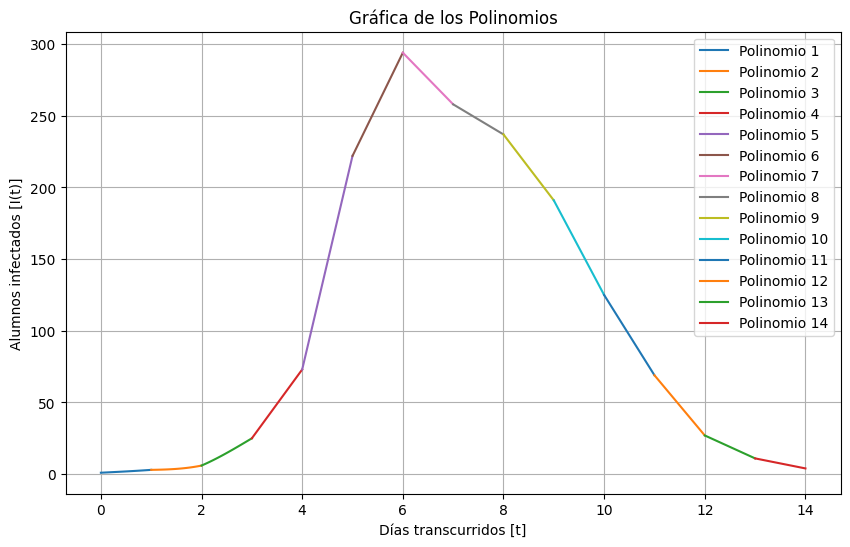

In [10]:
def plot_polynomials(coefficients, ranges):
    x = np.linspace(ranges[0], ranges[1], 100)
    y = np.zeros_like(x)

    for i, coeff in enumerate(coefficients):
        y += coeff * (x - ranges[0]) ** i

    return x, y

coefficients = [
    [1.0, 1.7477166666666666, 0.0, 0.25228333333333336],
    [3.0, 0.5520766666666668, 0.75685, 1.6910733333333334],
    [6.0, 15.113286666666667, 5.83007, -1.9433566666666666],
    [25.0, 48.0, 0.0, 0.0],
    [73.0, 149.0, 0.0, 0.0],
    [222.0, 72.0, 0.0, 0.0],
    [294.0, -36.0, 0.0, 0.0],
    [258.0, -21.0, 0.0, 0.0],
    [237.0, -46.0, 0.0, 0.0],
    [191.0, -66.0, 0.0, 0.0],
    [125.0, -56.0, 0.0, 0.0],
    [69.0, -42.0, 0.0, 0.0],
    [27.0, -16.0, 0.0, 0.0],
    [11.0, -7.0, 0.0, 0.0]
]

ranges = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9),
    (9, 10), (10, 11), (11, 12), (12, 13), (13, 14)
]

graf.figure(figsize=(10, 6))


for i in range(len(coefficients)):
    x, y = plot_polynomials(coefficients[i], ranges[i])
    graf.plot(x, y, label=f'Polinomio {i+1}')

graf.ylabel("Alumnos infectados [I(t)]")
graf.xlabel("Días transcurridos [t]")
graf.title('Gráfica de los Polinomios')
graf.legend()
graf.grid(True)
graf.show()